In [74]:
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylabㅌ
import pandas as pd
import seaborn as sns
import random
import pickle



from InitializeSpeciesPool import *
from LV import *
from VariousMetrics import *

sns.set_style("ticks")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}



session_name="results/test"


# Function Definition

In [2]:
from scipy.integrate import odeint

def gLV_env(y, t, beta, delta, migration_rate, I, g, k, p, q, varIdx):
    # p : species -> pH
    # q : pH -> species
    dydt = np.zeros(len(varIdx['env']) + len(varIdx['species']))
    
    growth_rate_multiplier = 1 - (np.matmul(I, y[varIdx['species']])) / k + np.matmul(q, y[varIdx['env']])
    
    dydt[varIdx['species']] = np.multiply(np.multiply(y[varIdx['species']], g), growth_rate_multiplier) + migration_rate #- death_rate * y[varIdx['species']]
    dydt[varIdx['env']] = delta * (-y[varIdx['env']]) + beta* np.matmul(p, y[varIdx['species']]) - delta * 0.0001 * y[varIdx['env']]**5
    
    return dydt

def run_gLV_env_dynamics(y0_species, y0_env, t, system_config, species_index, env_index, to_plot=False):
    

    N=system_config['N']
    N_env=system_config['N_env']
    beta = system_config['beta']
    delta = system_config['delta']
    migration_rate = system_config['migration_rate']
    I = system_config['I']
    g = system_config['g']
    k = system_config['k']
    p = system_config['p']
    q = system_config['q']
                                   
    I=I[species_index,:]
    I=I[:,species_index]
    g=g[species_index]
    k=k[species_index]
    p=p[:,species_index] # p is N_env x N
    p=p[env_index,:]                               
    q=q[species_index,:] # q is N x N_Nev
    q=q[:,env_index]                             
    
    varIdx={'species' : np.arange(len(species_index)),
           'env' : np.arange(len(species_index),len(species_index)+len(env_index))}
    y0=np.concatenate((y0_species, y0_env))
    
    y = odeint(gLV_env, y0, t, args=(beta, delta, migration_rate, I, g, k, p, q, varIdx), atol=1e-12, rtol=1e-10)
    y_out={}
    y_out_species=np.zeros(N)
    y_out_env=np.zeros(N_env)

    for i in range(len(species_index)):
        y_out_species[species_index[i]]=y[-1,i]
        y_out['species']=y_out_species
    for i in range(len(env_index)):
        y_out_env[env_index[i]]=y[-1,len(species_index)+i]
        y_out['env']=y_out_env
    
    if to_plot:
        # Create plots
        fig, axs = plt.subplots(2, 1, figsize=(7, 6))  # 2 Rows, 1 Column

        # Plotting species data
        for i in range(len(species_index)):
            axs[0].plot(t, y[:, i], label=f'Species {i+1}')
        axs[0].set_title('Species Time Series')
        axs[0].set_xlabel('Time (log scale)')
        axs[0].set_ylabel('Value (log scale)')
        axs[0].set_xscale('log')
        axs[0].set_yscale('log')
        axs[0].axhline(y=1e-6, color='r', linestyle='dotted', linewidth=1)
        axs[0].set_ylim(1e-6, 100)

        axs[0].legend()

        # Plotting environmental data
        for i in range(len(env_index)):
            axs[1].plot(t, y[:, len(species_index)+i], label=f'Env Variable {i+1}')
        axs[1].set_title('Environmental Variables Time Series')
        axs[1].set_xlabel('Time (log scale)')
        axs[1].set_ylabel('Env Value')
        axs[1].set_xscale('log')
        axs[1].legend()

        
        plt.tight_layout()
        plt.show()
    print(y_out)
    return y_out


# PARAMETER DEFINITION

In [3]:
def uniform_distribution(u,o):
    return u+(2*o)*np.random.random()-o

def input_distribution(k):
    return np.random.exponential(k)

In [ ]:
def one_hot_vector(n_species,i):
    # Create an array of length n_species with all values set to 0.001
    vector = np.full(n_species, 0.0001)
    
    # Set the ith element to 0.1
    vector[i] = 0.01
    
    return vector

Classification 1: Indices [2, 3, 4, 5, 6, 9, 10, 11, 12, 15, 16, 17, 21, 22, 23, 24, 25, 27, 29, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 62, 63, 64, 65, 67, 68, 70, 71, 73, 76, 77, 78, 79, 80, 82, 84, 85, 87, 89, 91, 92, 95, 96, 98, 99]
Classification 2: Indices [0, 14, 18, 19, 26, 32, 55, 57, 58, 60, 61, 72, 74, 75, 86]
Classification 3: Indices [37, 39, 43, 44, 83, 88, 90, 97]
Classification 4: Indices [7, 8, 13, 20, 69, 81, 93, 94]
Classification 5: Indices [1, 28, 66]


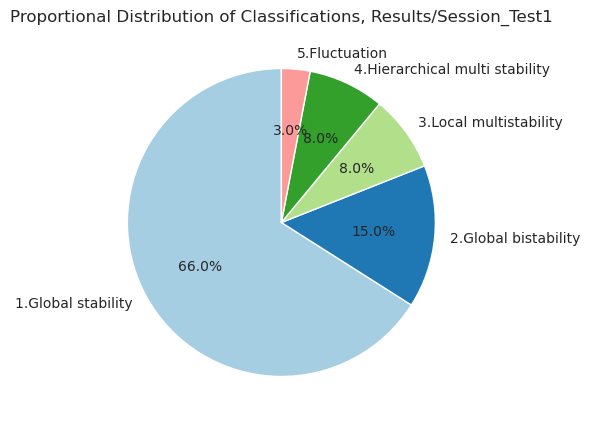

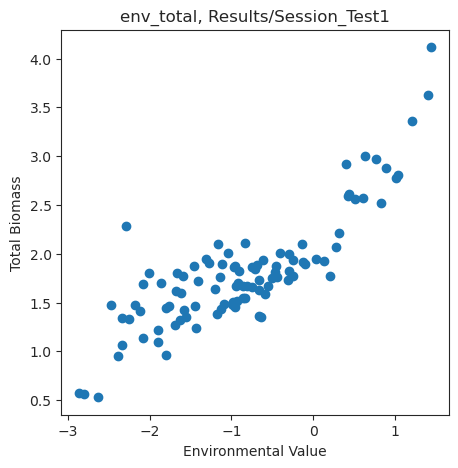

Classification 1: Indices [6, 7, 8, 9, 10, 11, 14, 24, 28, 30, 33, 35, 36, 37, 40, 42, 43, 47, 49, 51, 52, 55, 66, 77, 78, 88, 94, 96]
Classification 2: Indices [1, 5, 13, 18, 19, 20, 27, 31, 41, 46, 48, 50, 53, 56, 57, 69, 70, 72, 79, 86, 87, 95]
Classification 3: Indices [2, 23, 32, 34, 59, 60, 61, 64, 65, 74, 80, 83, 84, 93]
Classification 4: Indices [29, 38, 44, 54, 63, 67, 68, 71, 73, 76, 81, 89, 90, 91, 92]
Classification 5: Indices [0, 3, 4, 12, 15, 16, 17, 21, 22, 25, 26, 39, 45, 58, 62, 75, 82, 85, 97, 98, 99]


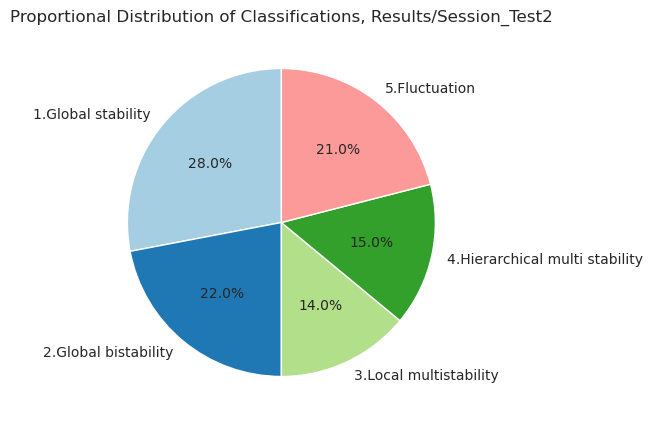

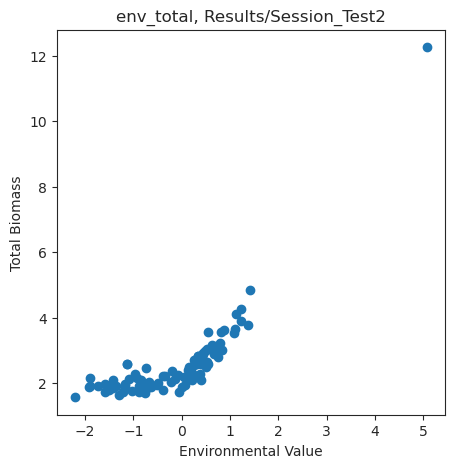

Classification 1: Indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Classification 2: Indices []
Classification 3: Indices []
Classification 4: Indices []
Classification 5: Indices []


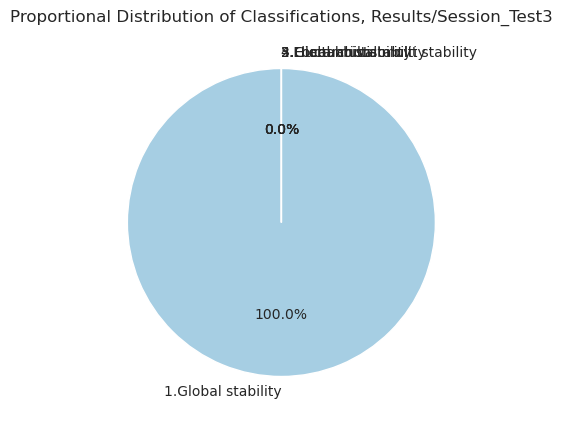

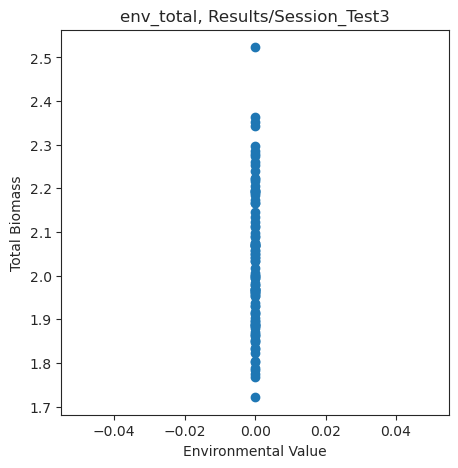

Classification 1: Indices [2, 3, 5, 6, 9, 10, 11, 12, 15, 16, 17, 22, 23, 24, 25, 27, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 59, 63, 64, 65, 66, 67, 70, 71, 73, 76, 77, 79, 80, 82, 84, 85, 87, 89, 91, 92, 95, 96, 97]
Classification 2: Indices [0, 4, 7, 8, 13, 14, 18, 19, 20, 21, 26, 32, 33, 44, 54, 55, 57, 58, 60, 61, 62, 68, 72, 74, 75, 78, 86, 93]
Classification 3: Indices [1, 43, 88, 99]
Classification 4: Indices [28, 69, 83, 94]
Classification 5: Indices [81, 90, 98]


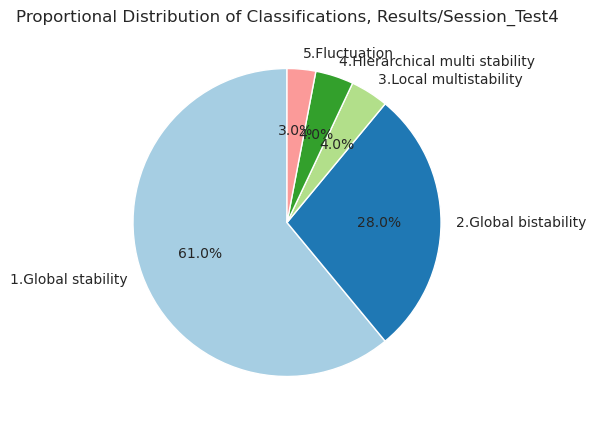

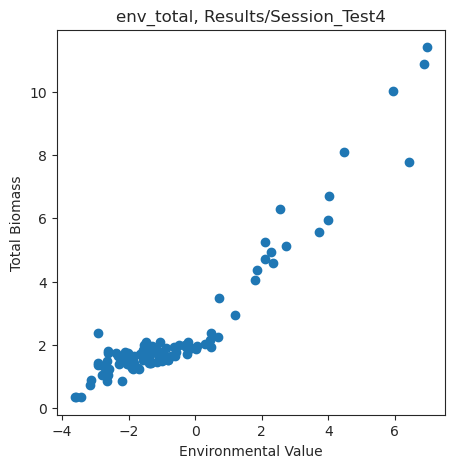

Classification 1: Indices [0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 18, 19, 25, 26, 28, 30, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 57, 58, 59, 60, 62, 63, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99]
Classification 2: Indices [5, 14, 17, 21, 23, 29, 32, 37, 52, 73, 83]
Classification 3: Indices [16, 22, 24, 31, 39, 56, 61, 71, 79, 91]
Classification 4: Indices [20]
Classification 5: Indices [10, 27, 55, 64]


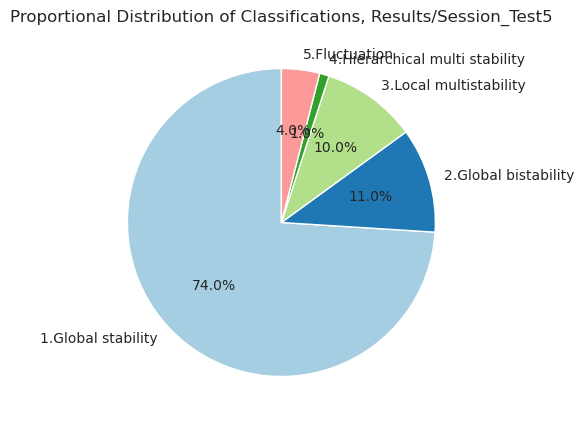

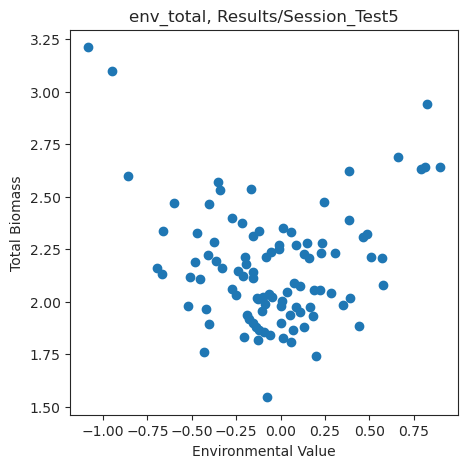

In [121]:
Session_name_list=[f'Results/Session_Test{i}' for i in [1,2,3,4,5]]

for Session_name in Session_name_list:
    # Open the file in binary read mode
    with open(Session_name + '/result_and_description.pkl', 'rb') as file:
        # Load the data from the file
        data = pickle.load(file)

    # Now you can use the 'data' object as it was originally saved
    results=data['result']
    description=data['description']

    def cluster_env_values(data, threshold):
        # Sort the data and store the original indices
        indices = np.argsort(data)
        sorted_data = data[indices]

        # Initialize the first cluster
        clusters = []
        cluster_indices = []
        current_cluster = [sorted_data[0]]
        current_indices = [indices[0]]

        # Iterate over the sorted data to form clusters
        for i in range(1, len(sorted_data)):
            if sorted_data[i] - sorted_data[i - 1] < threshold:
                # Add to the current cluster
                current_cluster.append(sorted_data[i])
                current_indices.append(indices[i])
            else:
                # Save the current cluster and start a new one
                clusters.append(current_cluster)
                cluster_indices.append(current_indices)
                current_cluster = [sorted_data[i]]
                current_indices = [indices[i]]

        # Add the last cluster
        clusters.append(current_cluster)
        cluster_indices.append(current_indices)

        return clusters, cluster_indices

    def classifier(species_matrix,env_data):
        env_clusters, cluster_indices = cluster_env_values(env_data, 0.01)

        if len(env_clusters)>4:
            return 5
        if len(env_clusters)==1:
            return 1
        env_values_clusters=np.array([mean(cluster) for cluster in env_clusters])
        if np.all(env_values_clusters>0) or np.all(env_values_clusters<0):
            return 3
        if len(env_clusters)==2:
            return 2
        if len(env_clusters)==3 or len(env_clusters)==4:
            return 4

    classification_indices = {1: [], 2: [], 3: [], 4: [], 5: []}
    total_biomasses=[]
    env_values=[]
    # Iterate over results and classify
    for key, value in results.items():
        species_matrix = value['species']
        env_data = value['env']
        classification = classifier(species_matrix, env_data)
        classification_indices[classification].append(key)

        total_biomasses+=[species_matrix.sum(1)[cluster_indice[0]] for cluster_indice in cluster_indices]
        env_values+=[env_data[cluster_indice[0]] for cluster_indice in cluster_indices]


    # Print classification results
    for cls, idxs in classification_indices.items():
        print(f"Classification {cls}: Indices {idxs}")

    def plot_classification_pie_chart(classification_indices, Session_name, to_save=True):
        counts = [len(indices) for indices in classification_indices.values()]
        class_labels = ["1.Global stability", "2.Global bistability", "3.Local multistability", "4.Hierarchical multi stability", "5.Fluctuation"]

        plt.figure(figsize=(5, 5))
        plt.pie(counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(counts))))    
        plt.title(f'Proportional Distribution of Classifications, {Session_name}')
        if to_save:
            plt.savefig(f'{Session_name}/pyplot_classes.png')
        plt.show()

    def plot_env_total(env_values,total_biomasses, Session_name, to_save=True):
        plt.figure(figsize=(5, 5))
        plt.scatter(env_values,total_biomasses)
        plt.title(f'env_total, {Session_name}')
        plt.xlabel('Environmental Value')  # Adding x-axis label
        plt.ylabel('Total Biomass')  # Adding y-axis label
        if to_save:
            plt.savefig(f'{Session_name}/plot_env_total.png')
        plt.show()

    plot_classification_pie_chart(classification_indices, Session_name, to_save=True)
    plot_env_total(env_values,total_biomasses, Session_name, to_save=True)


In [119]:
Session_name + '/result_and_description.pkl'

'Results/Session_Test5/result_and_description.pkl'

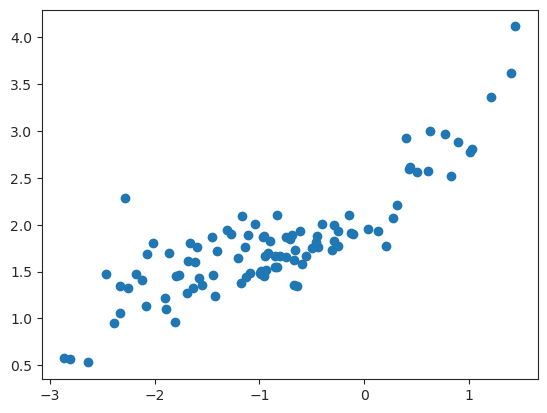

In [107]:
plt.scatter(env_values,total_biomasses)

In [100]:
total_biomasses=[species_matrix.sum(1)[cluster_indice[0]] for cluster_indice in cluster_indices]
env_values=[env_data[cluster_indice[0]] for cluster_indice in cluster_indices]

In [101]:
env_values

[0.4251570769101856]

In [64]:
def classifier(species_matrix,env_data):
    env_clusters, cluster_indices = cluster_env_values(env_data, 0.01)
    if len(env_clusters)>4:
        return 5
    if len(env_clusters)==1:
        return 1
    env_values_clusters=np.array([mean(cluster) for cluster in env_clusters])
    if np.all(env_values_clusters>0) or np.all(env_values_clusters<0):
        return 3
    if len(env_clusters)==2:
        return 2
    if len(env_clusters)==3 or len(env_clusters)==4:
        return 4
    
classification_indices = {1: [], 2: [], 3: [], 4: [], 5: []}

# Iterate over results and classify
for key, value in results.items():
    species_matrix = value['species']
    env_data = value['env']
    classification = classifier(species_matrix, env_data)
    classification_indices[classification].append(key)

# Print classification results
for cls, idxs in classification_indices.items():
    print(f"Classification {cls}: Indices {idxs}")
    
def plot_classification_pie_chart(classification_indices, session_name, to_save=True):
    counts = [len(indices) for indices in classification_indices.values()]
    class_labels = ["1.Global stability", "2.Global bistability", "3.Local multistability", "4.Hierarchical multi stability", "5.Fluctuation"]

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(counts))))    
    plt.title(f'Proportional Distribution of Classifications, {session_name}')
    if to_save:
        plt.savefig(f'{session_name}/pyplot_classes.png')
    plt.show()

plot_classification_pie_chart(classification_indices, session_name, to_save=True)

Classification 1: Indices [2, 3, 4, 5, 6, 9, 10, 11, 12, 15, 16, 17, 21, 22, 23, 24, 25, 27, 29, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 62, 63, 64, 65, 67, 68, 70, 71, 73, 76, 77, 78, 79, 80, 82, 84, 85, 87, 89, 91, 92, 95, 96, 98, 99]
Classification 2: Indices [0, 14, 18, 19, 26, 32, 55, 57, 58, 60, 61, 72, 74, 75, 86]
Classification 3: Indices [37, 39, 43, 44, 83, 88, 90, 97]
Classification 4: Indices [7, 8, 13, 20, 69, 81, 93, 94]
Classification 5: Indices [1, 28, 66]


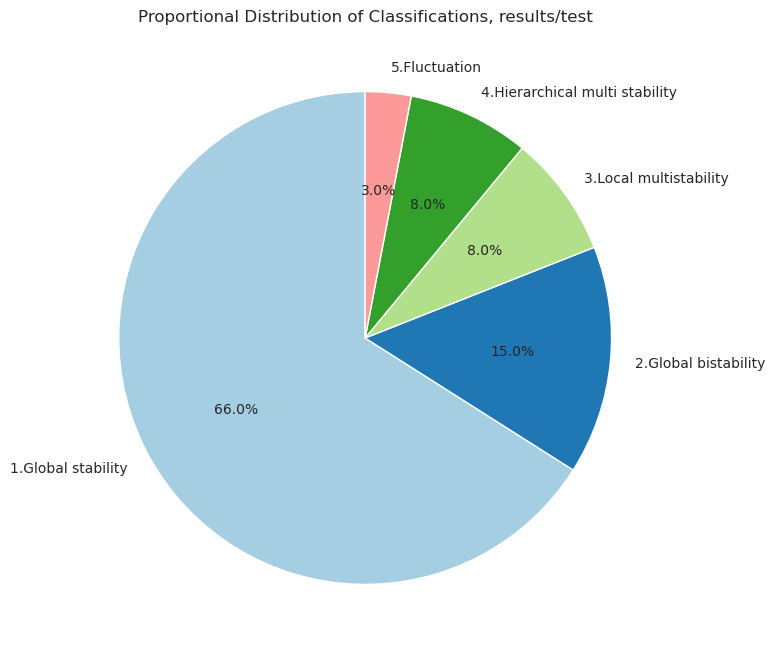

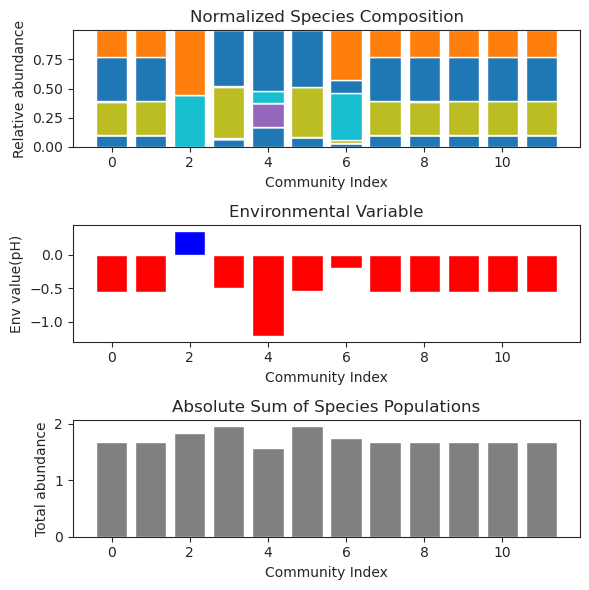

In [51]:
result=results[1]
        # Prepare subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 6))

species_matrix = result['species']
env_data = result['env']  # Assuming env is a single-element array

species_matrix = np.maximum(species_matrix, 0)  # Removing negative values for normalization
species_sums = np.sum(species_matrix, axis=1, keepdims=True)
normalized_species = species_matrix / species_sums
num_datasets = len(species_matrix)

absolute_sums = np.sum(species_matrix, axis=1)

if True:
    # Plotting species composition as stacked bars
    bottom_values = np.zeros(num_datasets)  # Initial bottom values are zeros
    for i in range(normalized_species.shape[1]):  # Loop through each species
        axs[0].bar(np.arange(num_datasets), normalized_species[:, i], bottom=bottom_values, label=f'Species {i+1}')
        bottom_values += normalized_species[:, i]  # Update bottom values for stacking

    axs[0].set_title('Normalized Species Composition')
    axs[0].set_xlabel('Community Index')
    axs[0].set_ylabel('Relative abundance')
    #axs[0].legend()

    # Plotting environmental factors
    colors = ['blue' if x > 0 else 'red' for x in env_data]  # Determine color based on sign of value
    axs[1].bar(np.arange(num_datasets), env_data, color=colors, width=0.8)
    axs[1].set_title('Environmental Variable')
    axs[1].set_xlabel('Community Index')
    axs[1].set_ylabel('Env value(pH)')

    # Plotting absolute sums of species data
    axs[2].bar(np.arange(num_datasets), absolute_sums, color='gray', width=0.8)
    axs[2].set_title('Absolute Sum of Species Populations')
    axs[2].set_xlabel('Community Index')
    axs[2].set_ylabel('Total abundance')

    plt.tight_layout()

    #if to_plot:
    #    plt.savefig()


    plt.show()